# Imports

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
df = pd.read_csv("./dataset/BankChurners.csv")

In [6]:
df.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [30]:
# Selecionar somente as colunas que importam para a análise
cols_to_keep = ['Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category',
                'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
                'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Utilization_Ratio', 
                'Attrition_Flag', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Open_To_Buy']


df = df[cols_to_keep]
df

Customer_Age Gender  Dependent_count Education_Level Marital_Status  \
0                45      M                3     High School        Married   
1                49      F                5        Graduate         Single   
2                51      M                3        Graduate        Married   
3                40      F                4     High School        Unknown   
4                40      M                3      Uneducated        Married   
...             ...    ...              ...             ...            ...   
10122            50      M                2        Graduate         Single   
10123            41      M                2         Unknown       Divorced   
10124            44      F                1     High School        Married   
10125            30      M                2        Graduate        Unknown   
10126            43      F                2        Graduate        Married   

      Income_Category Card_Category  Months_on_book  Total_Relationship_Count  \
0         $60K - $80K          Blue              39                         5   
1      Less than $40K          Blue              44                         6   
2        $80K - $120K          Blue              36                         4   
3      Less than $40K          Blue              34                         3   
4         $60K - $80K          Blue              21                         5   
...               ...           ...             ...                       ...   
10122     $40K - $60K          Blue              40                         3   
10123     $40K - $60K          Blue              25                         4   
10124  Less than $40K          Blue              36                         5   
10125     $40K - $60K          Blue              36                         4   
10126  Less than $40K        Silver              25                         6   

       Months_Inactive_12_mon  Contacts_Count_12_mon  Credit_Limit  \
0                           1                      3       12691.0   
1                           1                      2        8256.0   
2                           1                      0        3418.0   
3                           4                      1        3313.0   
4                           1                      0        4716.0   
...                       ...                    ...           ...   
10122                       2                      3        4003.0   
10123                       2                      3        4277.0   
10124                       3                      4        5409.0   
10125                       3                      3        5281.0   
10126                       2                      4       10388.0   

       Total_Revolving_Bal  Avg_Utilization_Ratio     Attrition_Flag  \
0                      777                  0.061  Existing Customer   
1                      864                  0.105  Existing Customer   
2                        0                  0.000  Existing Customer   
3                     2517                  0.760  Existing Customer   
4                        0                  0.000  Existing Customer   
...                    ...                    ...                ...   
10122                 1851                  0.462  Existing Customer   
10123                 2186                  0.511  Attrited Customer   
10124                    0                  0.000  Attrited Customer   
10125                    0                  0.000  Attrited Customer   
10126                 1961                  0.189  Attrited Customer   

       Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  Avg_Open_To_Buy  
0                 1144              42                1.625          11914.0  
1                 1291              33                3.714           7392.0  
2                 1887              20                2.333           3418.0  
3                 1171              20                2.333            796.

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_Age              10127 non-null  int64  
 1   Gender                    10127 non-null  object 
 2   Dependent_count           10127 non-null  int64  
 3   Education_Level           10127 non-null  object 
 4   Marital_Status            10127 non-null  object 
 5   Income_Category           10127 non-null  object 
 6   Card_Category             10127 non-null  object 
 7   Months_on_book            10127 non-null  int64  
 8   Total_Relationship_Count  10127 non-null  int64  
 9   Months_Inactive_12_mon    10127 non-null  int64  
 10  Contacts_Count_12_mon     10127 non-null  int64  
 11  Credit_Limit              10127 non-null  float64
 12  Total_Revolving_Bal       10127 non-null  int64  
 13  Avg_Utilization_Ratio     10127 non-null  float64
 14  Attrit

In [37]:
# Verificar a estatística descritiva do dataset
df.describe()


Customer_Age  Dependent_count  Months_on_book  \
count  10127.000000     10127.000000    10127.000000   
mean      46.325960         2.346203       35.928409   
std        8.016814         1.298908        7.986416   
min       26.000000         0.000000       13.000000   
25%       41.000000         1.000000       31.000000   
50%       46.000000         2.000000       36.000000   
75%       52.000000         3.000000       40.000000   
max       73.000000         5.000000       56.000000   

       Total_Relationship_Count  Months_Inactive_12_mon  \
count              10127.000000            10127.000000   
mean                   3.812580                2.341167   
std                    1.554408                1.010622   
min                    1.000000                0.000000   
25%                    3.000000                2.000000   
50%                    4.000000                2.000000   
75%                    5.000000                3.000000   
max                    6.000000                6.000000   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
count           10127.000000  10127.000000         10127.000000   
mean                2.455317   8631.953698          1162.814061   
std                 1.106225   9088.776650           814.987335   
min                 0.000000   1438.300000             0.000000   
25%                 2.000000   2555.000000           359.000000   
50%                 2.000000   4549.000000          1276.000000   
75%                 3.000000  11067.500000          1784.000000   
max                 6.000000  34516.000000          2517.000000   

       Avg_Utilization_Ratio  Total_Trans_Amt  Total_Trans_Ct  \
count           10127.000000     10127.000000    10127.000000   
mean                0.274894      4404.086304       64.858695   
std                 0.275691      3397.129254       23.472570   
min                 0.000000       510.000000       10.000000   
25%                 0.023000      2155.500000       45.000000   
50%                 0.176000      3899.000000       67.000000   
75%                 0.503000      4741.000000       81.000000   
max                 0.999000     18484.000000      139.000000   

       Total_Ct_Chng_Q4_Q1  Avg_Open_To_Buy  
count         10127.000000     10127.000000  
mean              0.712222      7469.139637  
std               0.238086      9090.685324  
min               0.000000         3.000000  
25%               0.582000      1324.500000  
50%               0.702000      3474.000000  
75%               0.818000      9859.000000  
max               3.714000     34516.000000

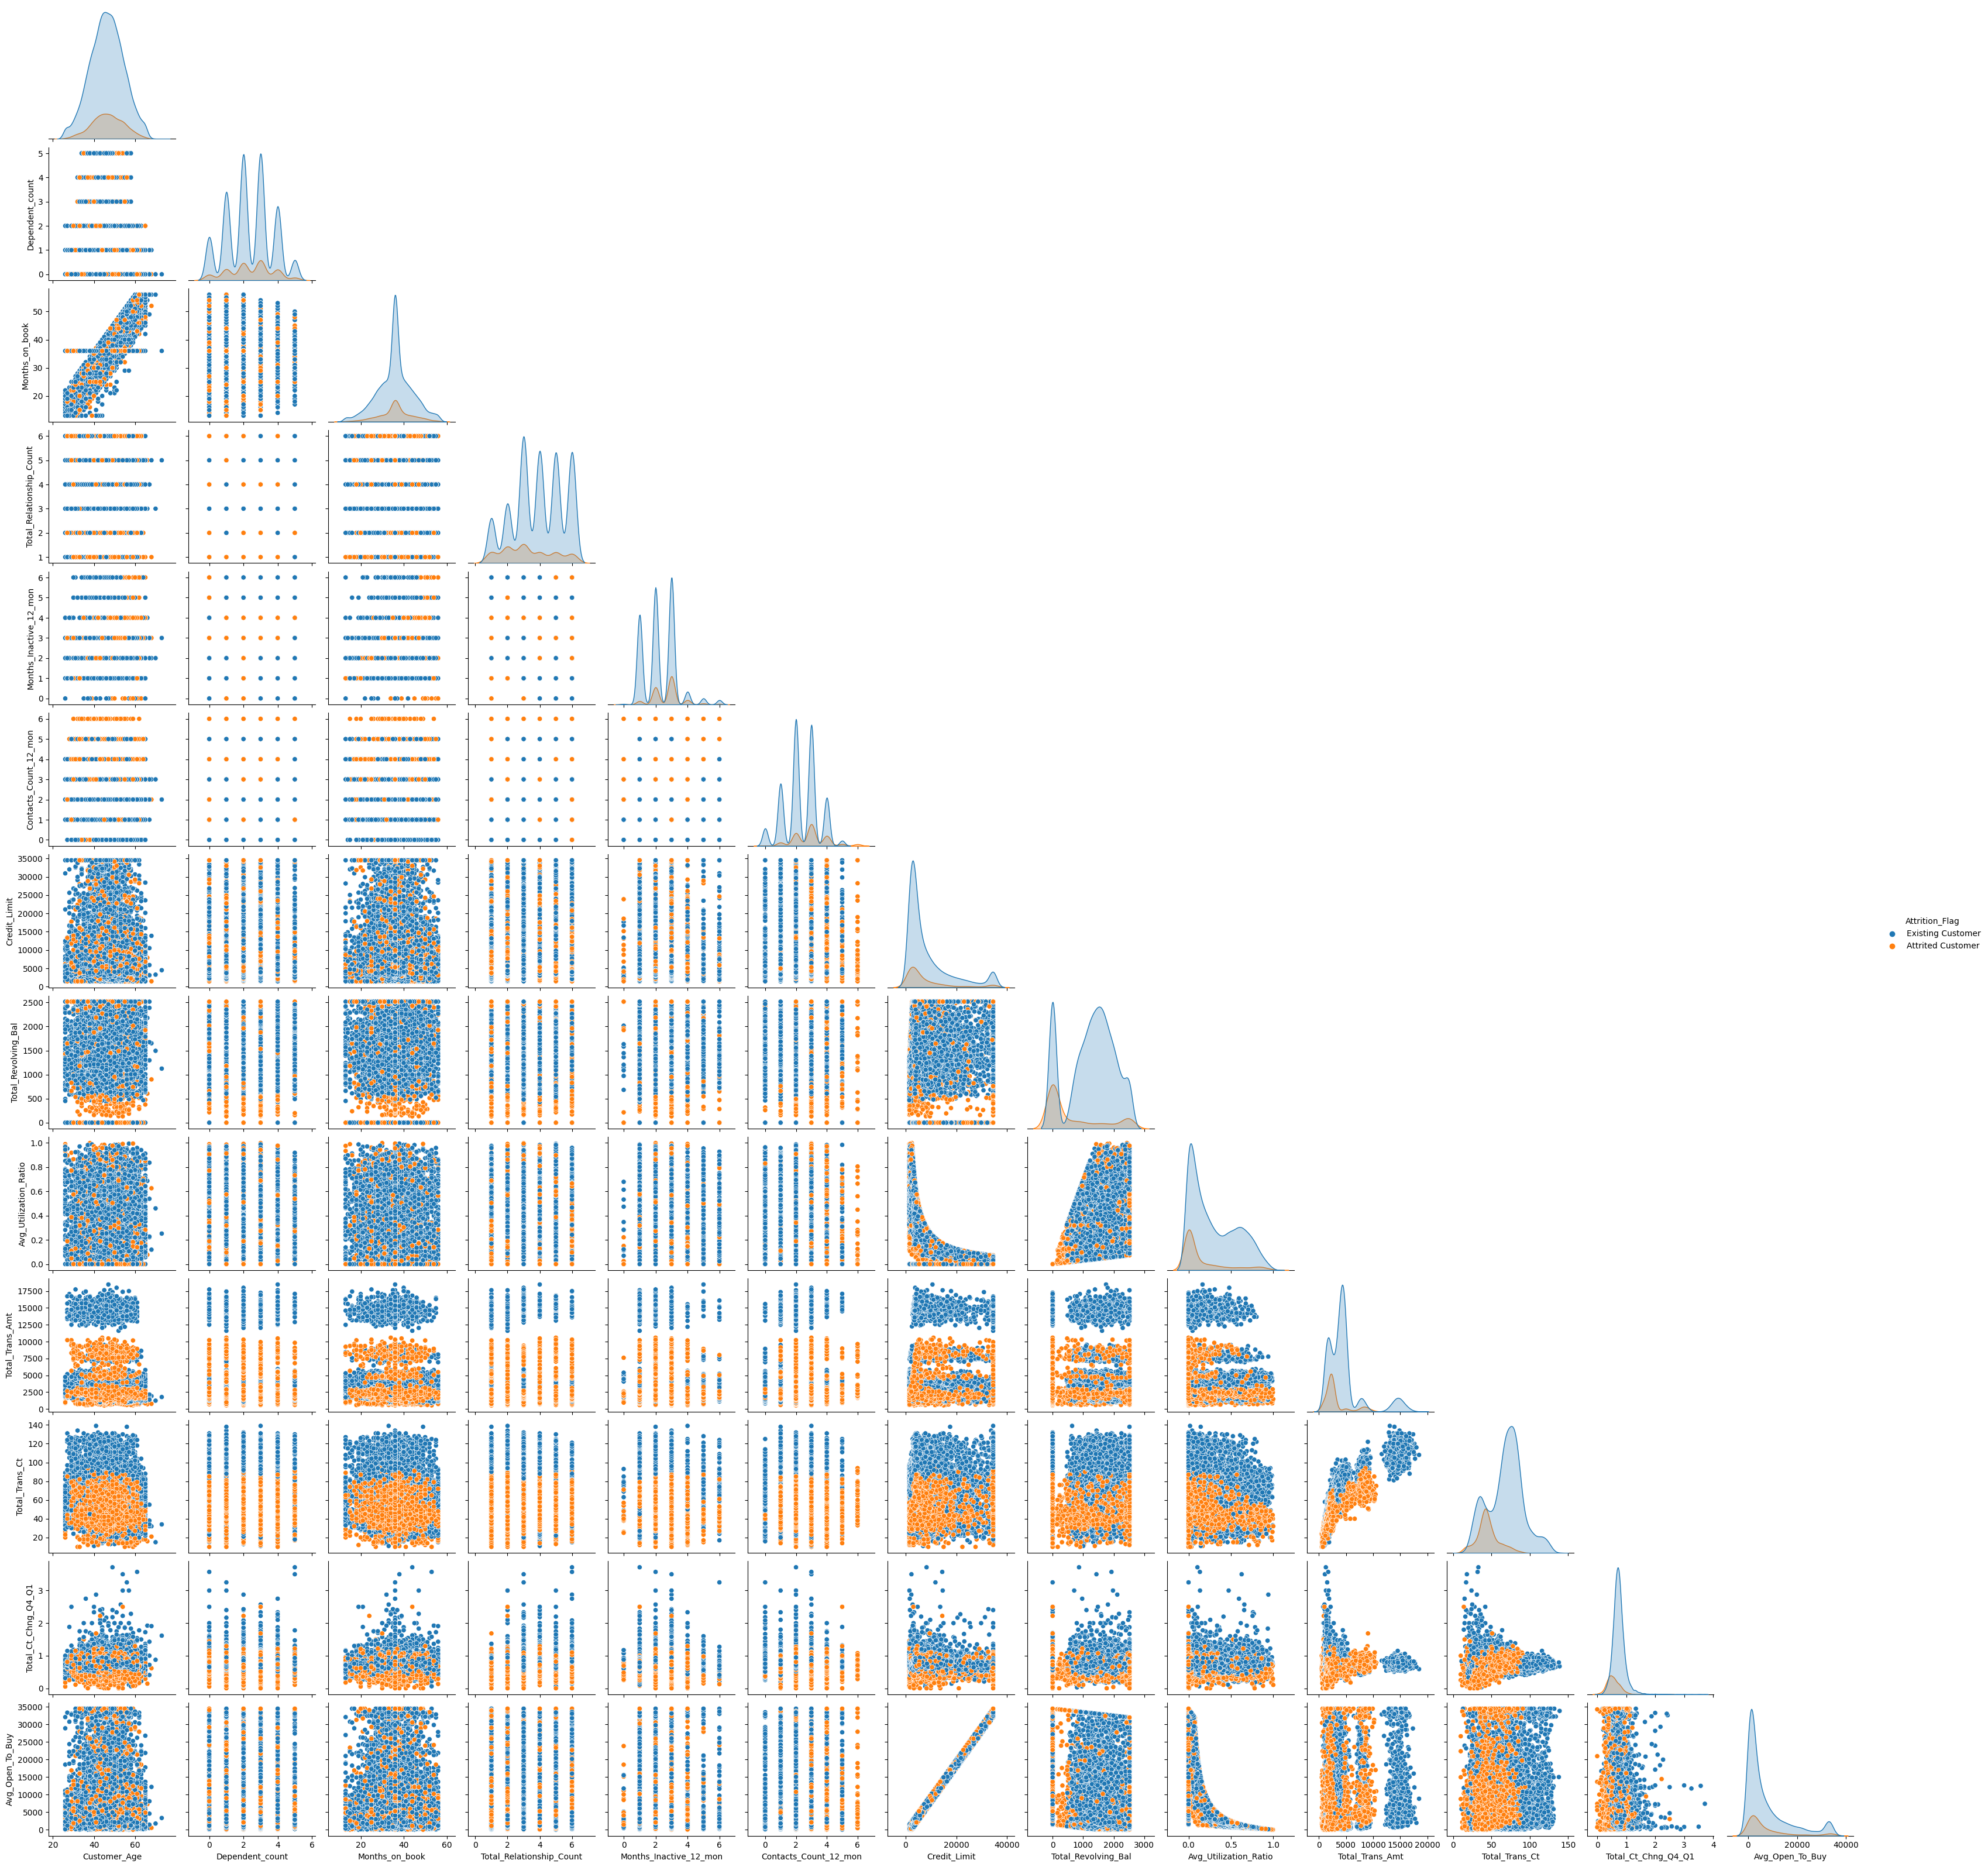

In [33]:
# Visualizando a distribuição das variáveis numéricas
num_cols = ['Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 
            'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 
            'Avg_Utilization_Ratio', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Open_To_Buy']

sns.pairplot(data=df[cols_to_keep], vars=num_cols, hue='Attrition_Flag', corner=True)
plt.show()


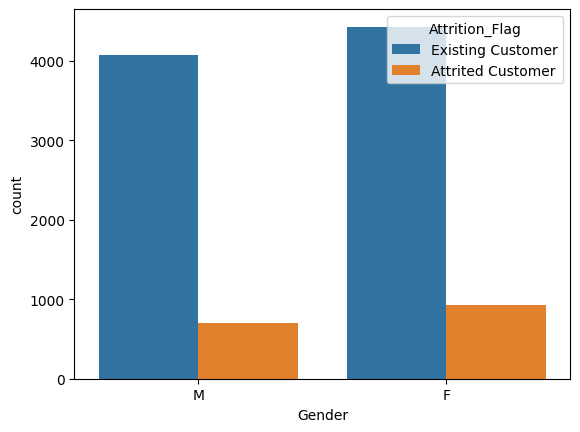

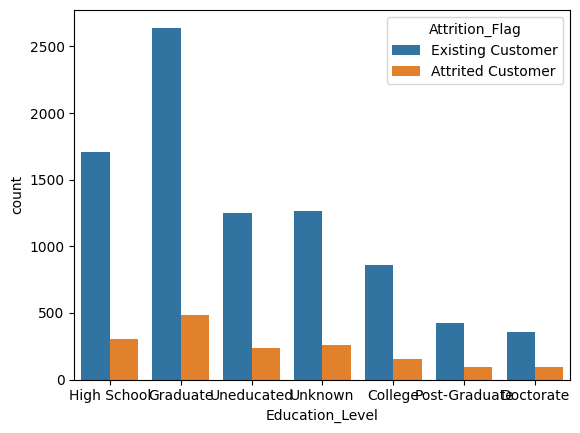

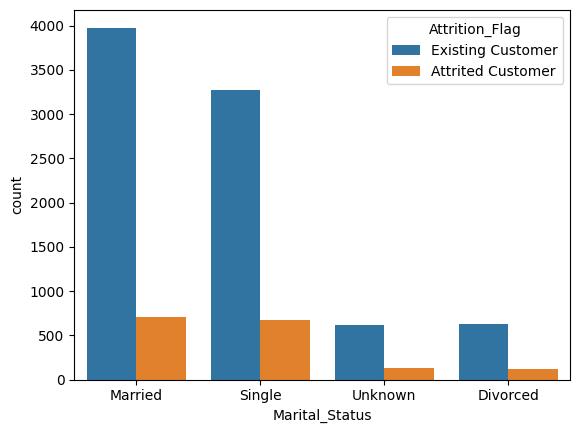

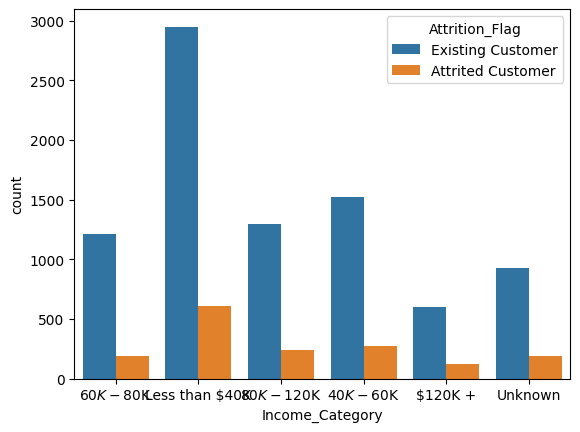

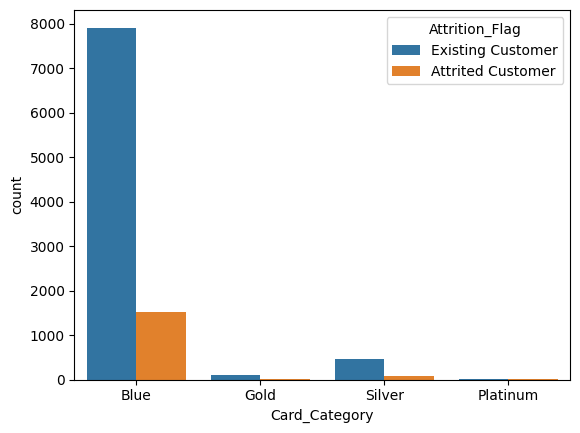

In [34]:
# Verificar a distribuição das variáveis categóricas em relação à variável alvo
cat_cols = ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']

for col in cat_cols:
    sns.countplot(data=df[cols_to_keep], x=col, hue='Attrition_Flag')
    plt.show()

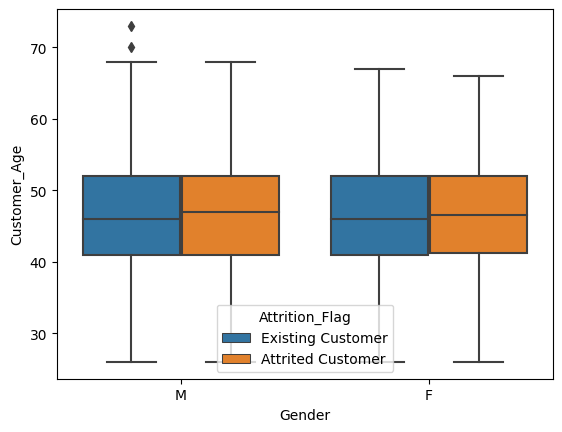

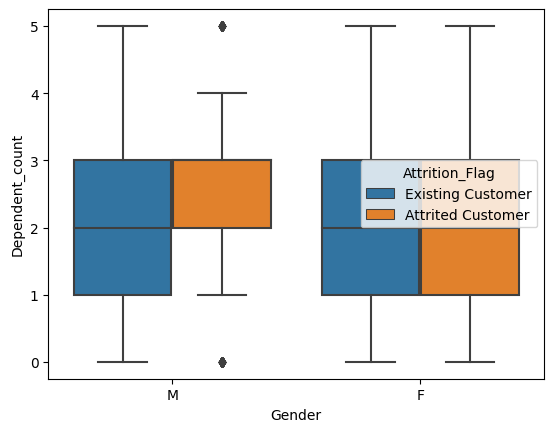

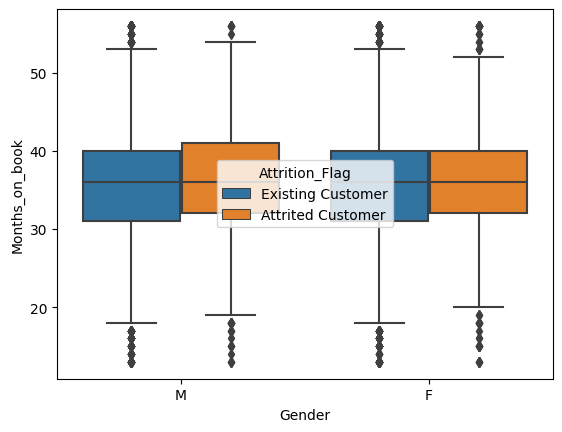

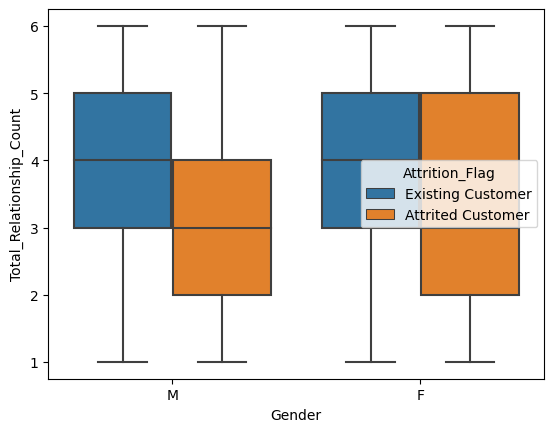

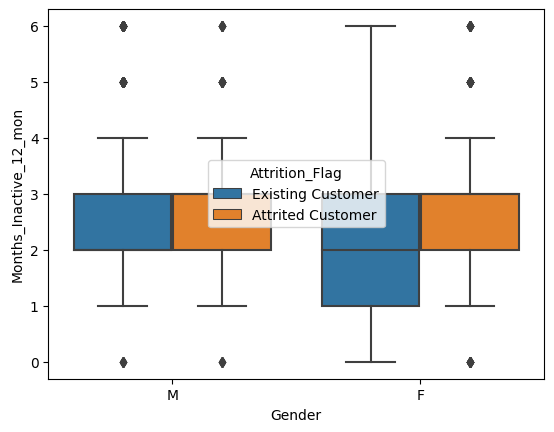

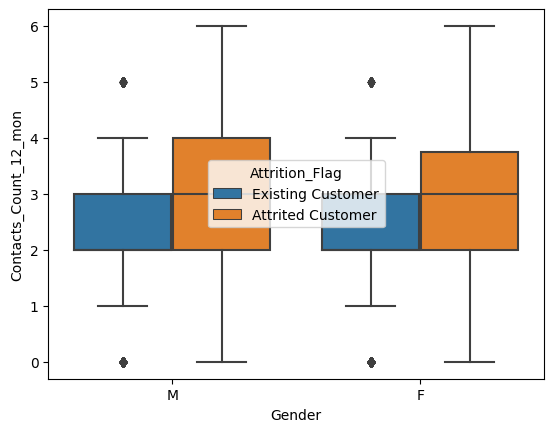

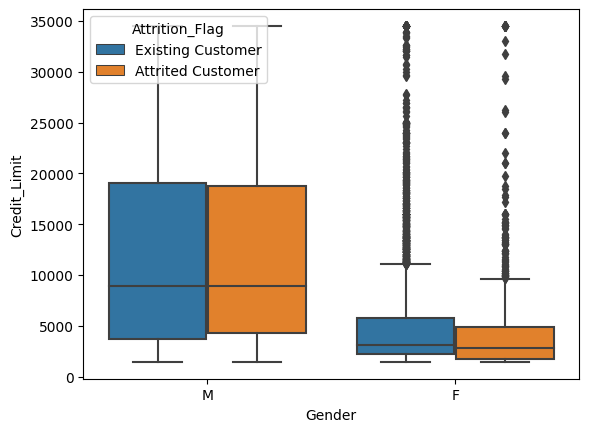

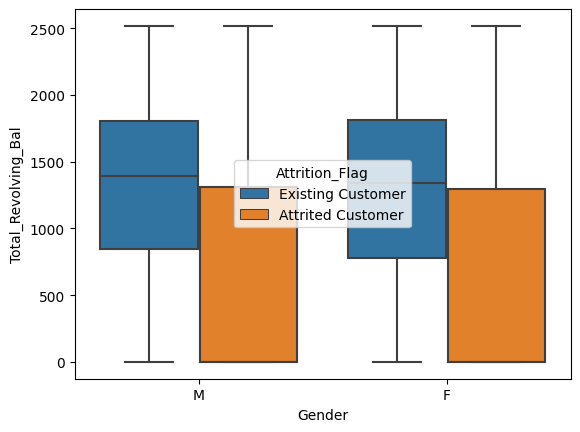

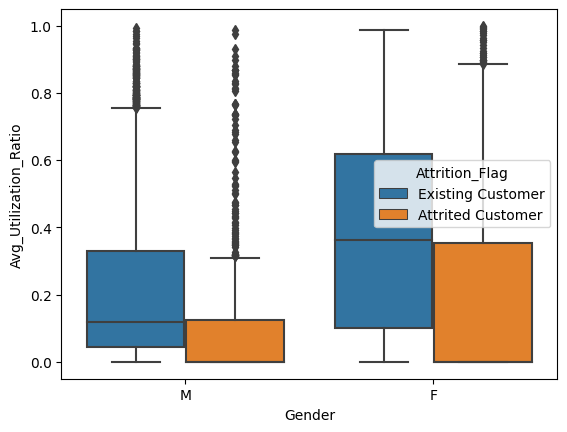

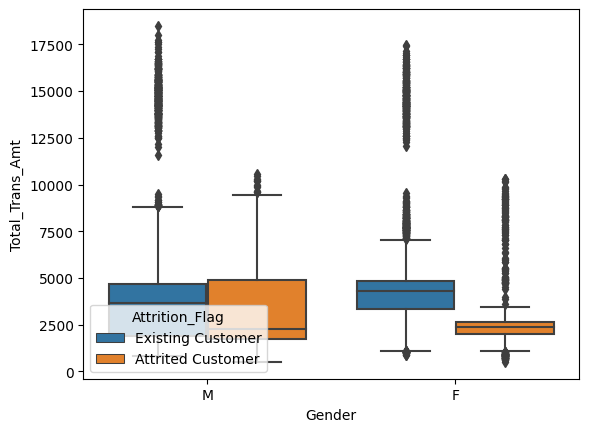

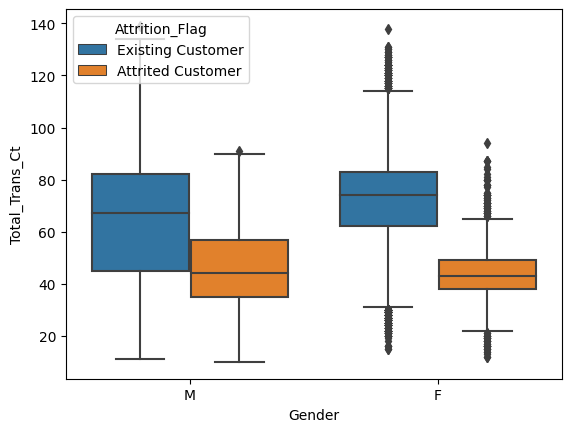

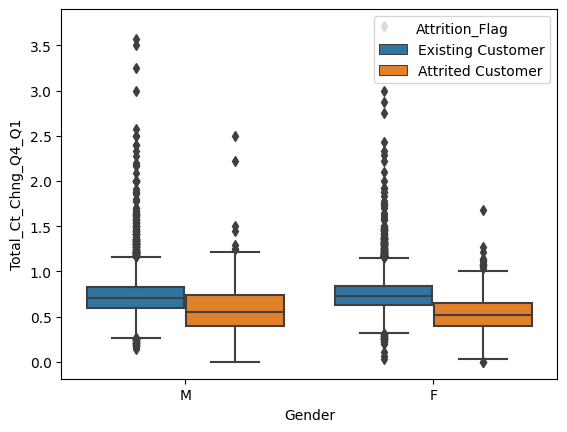

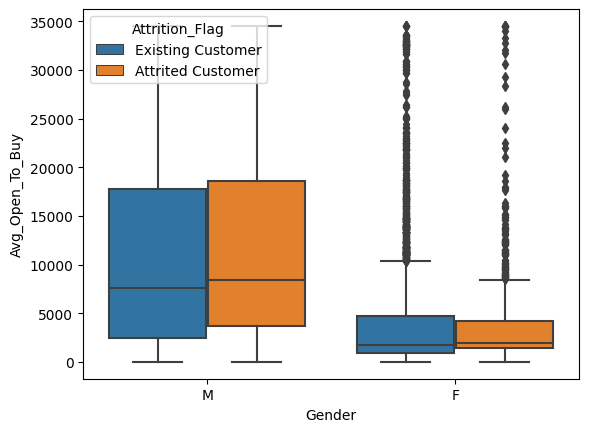

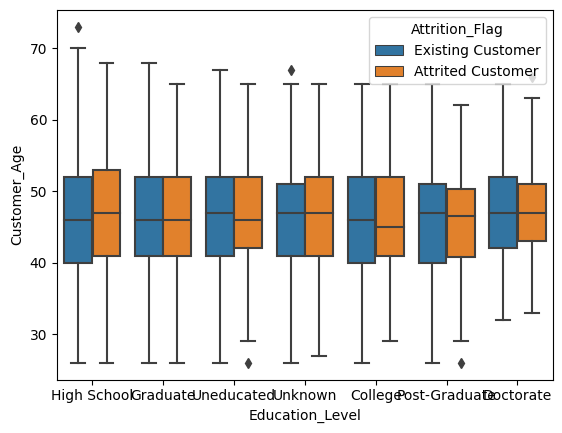

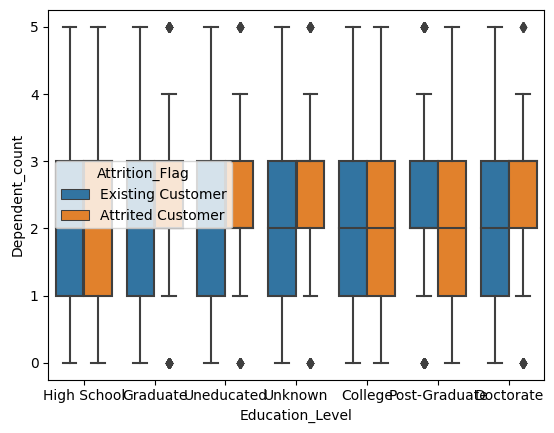

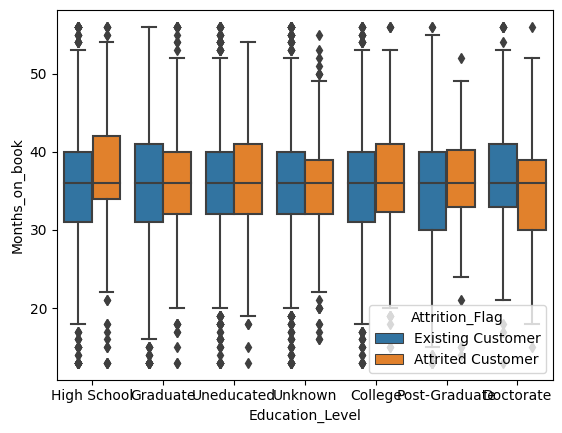

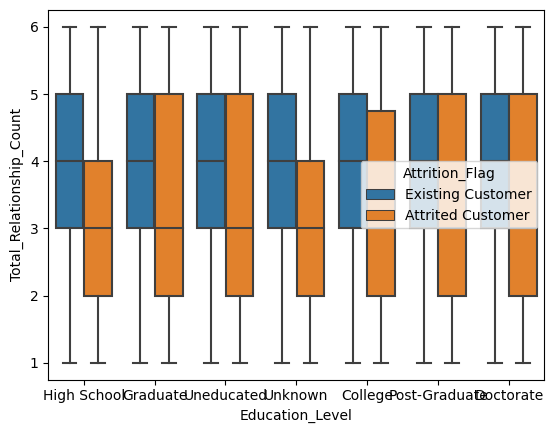

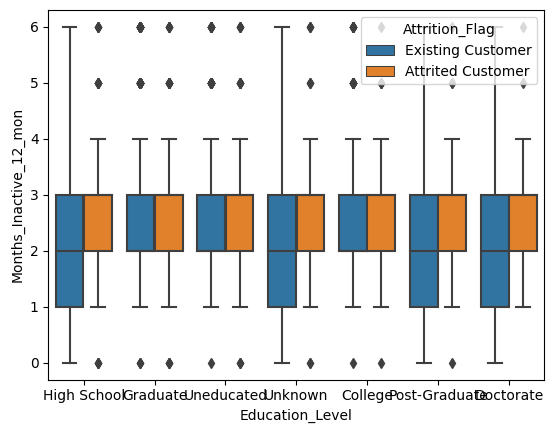

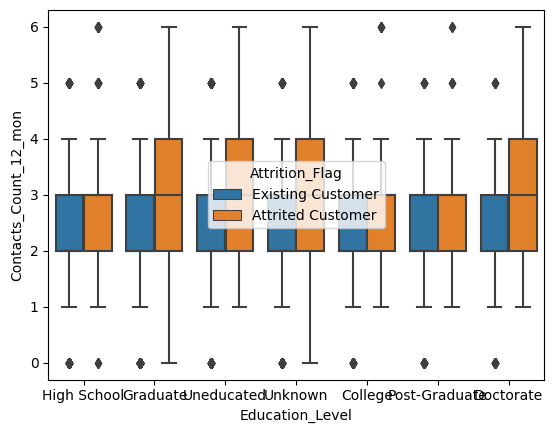

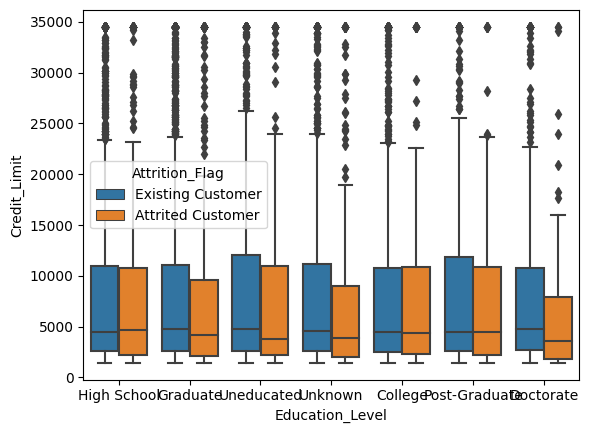

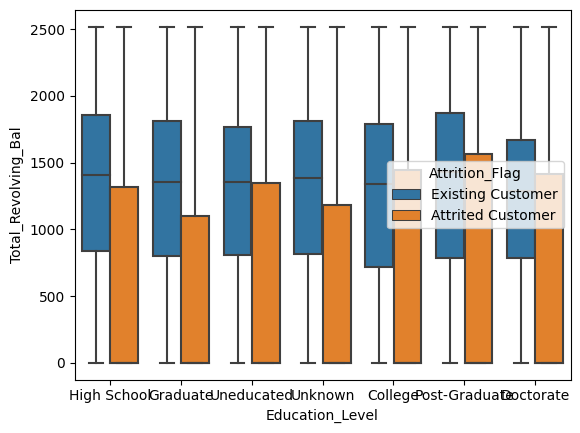

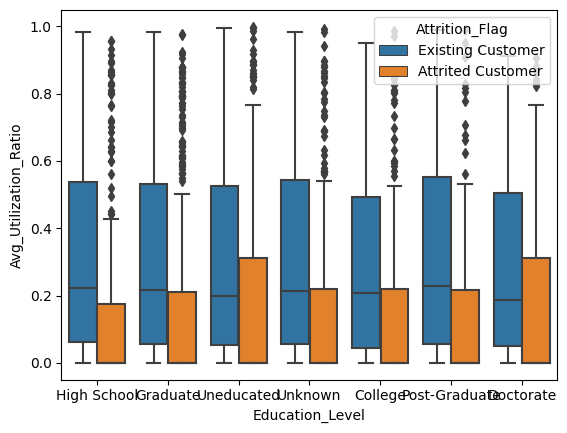

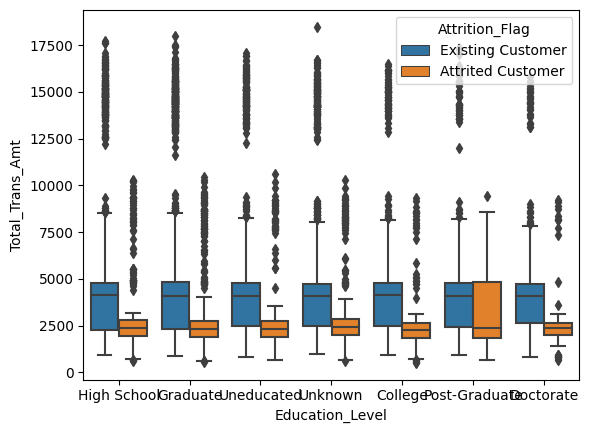

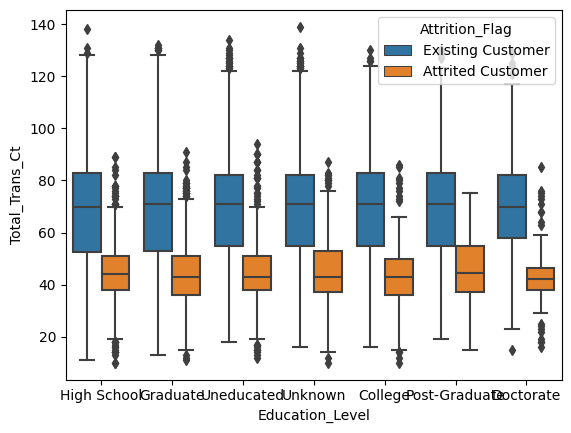

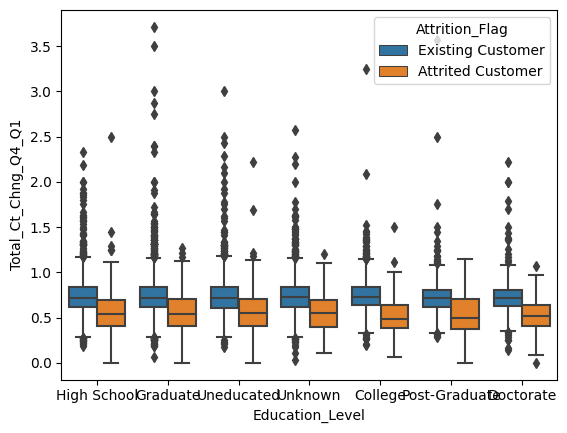

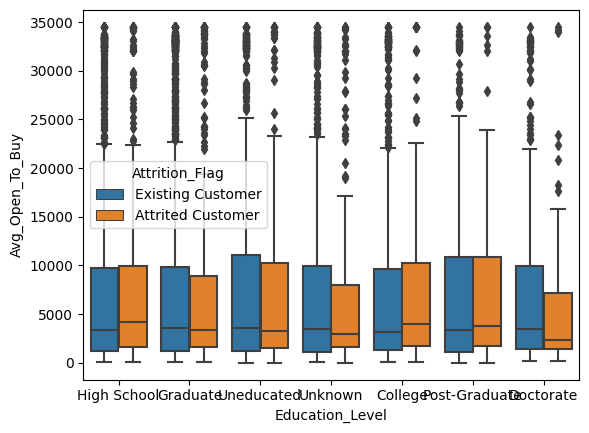

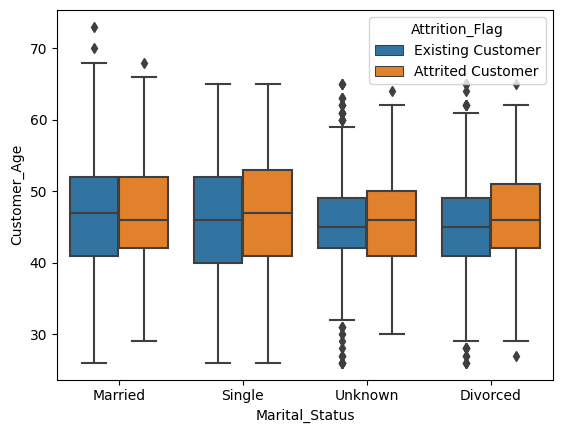

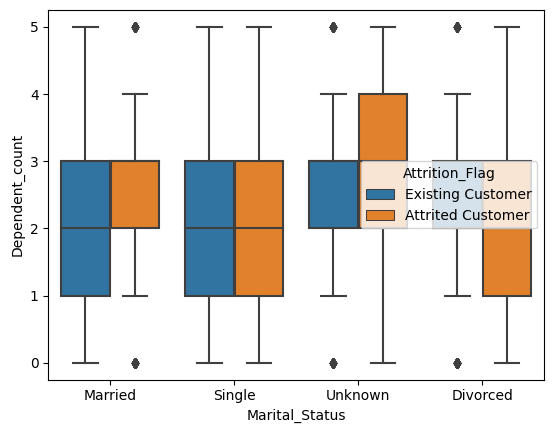

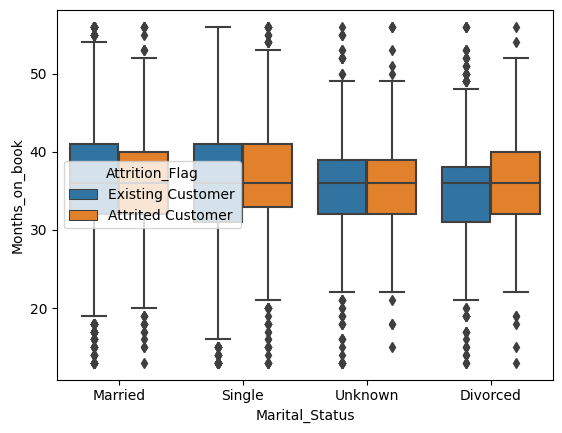

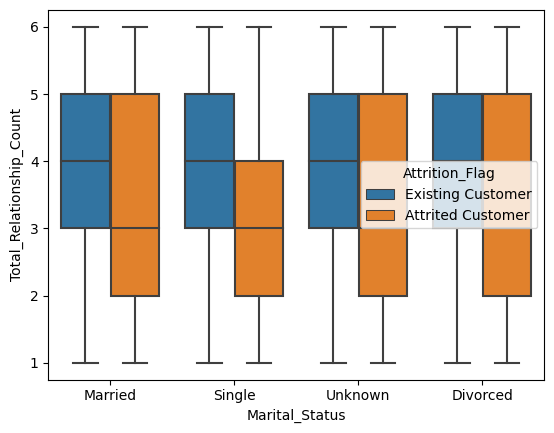

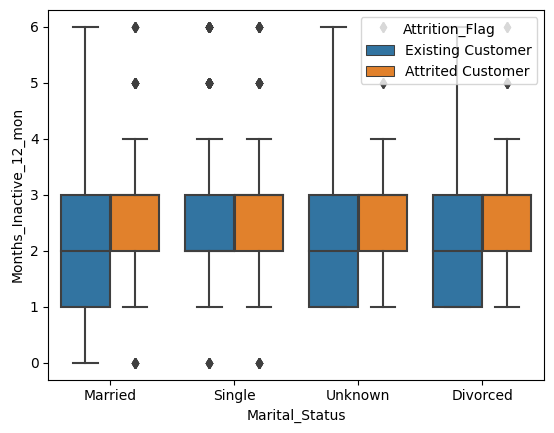

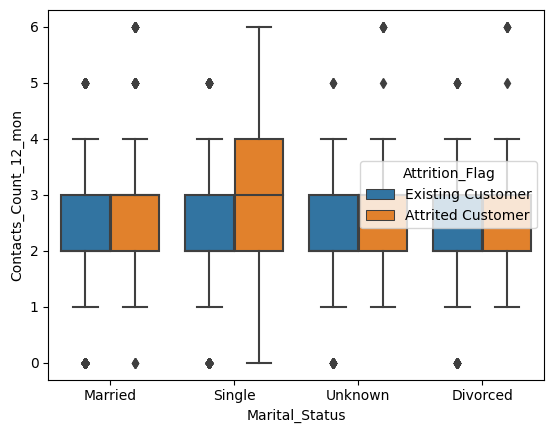

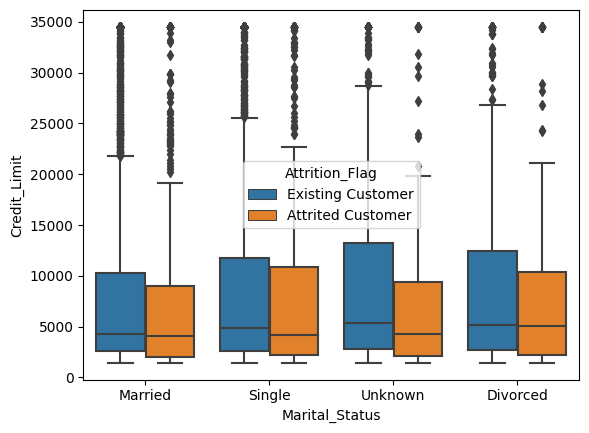

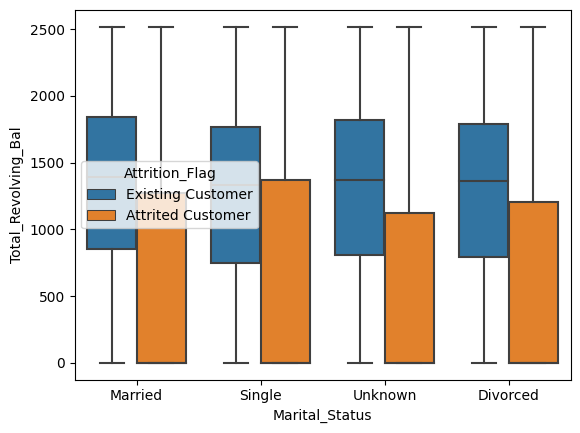

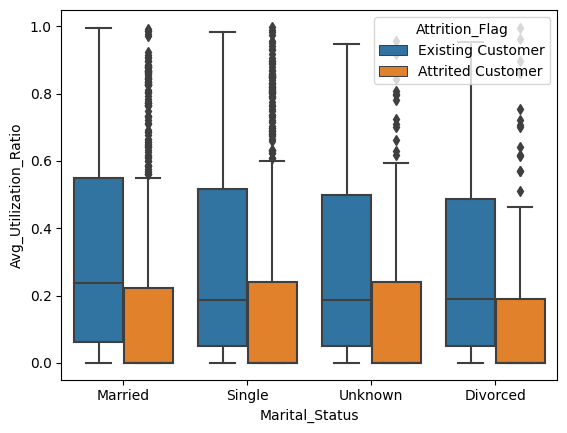

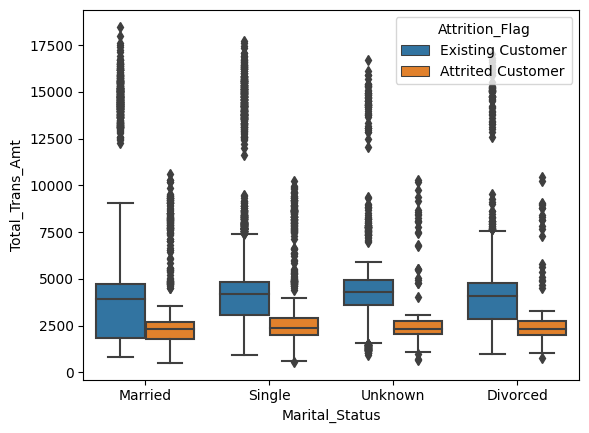

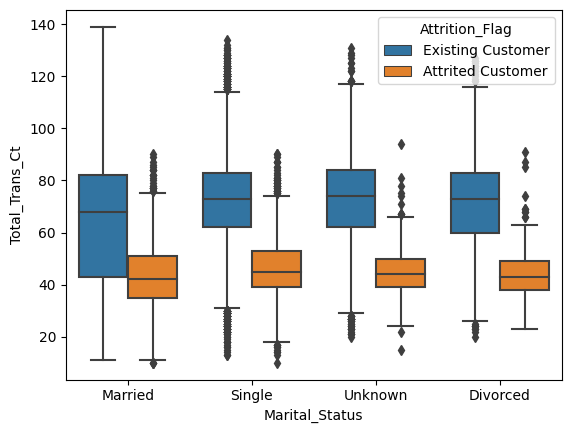

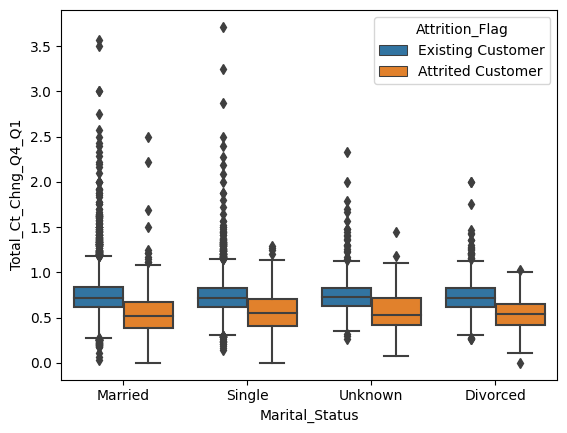

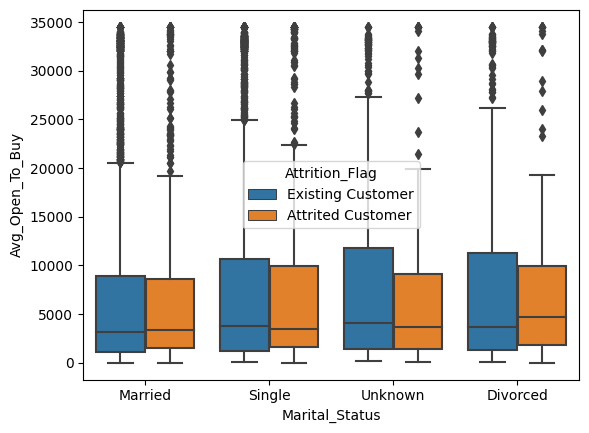

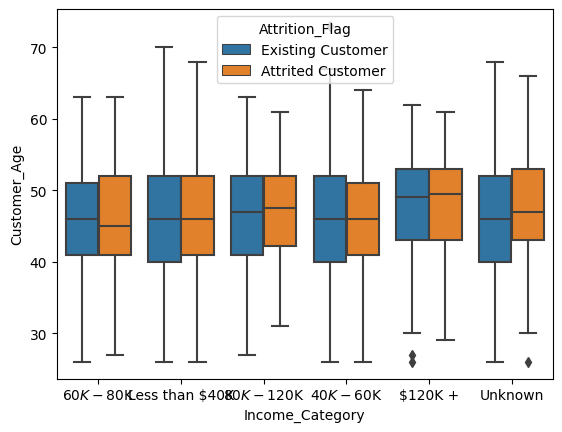

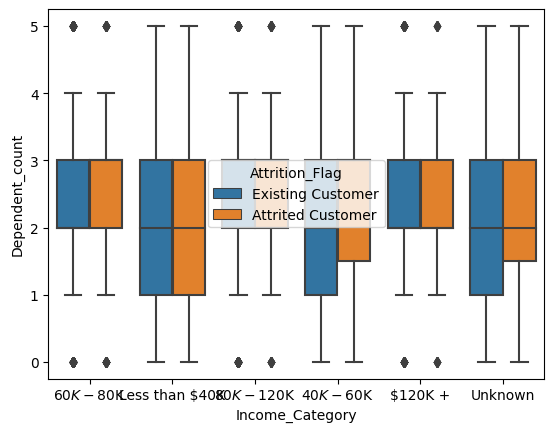

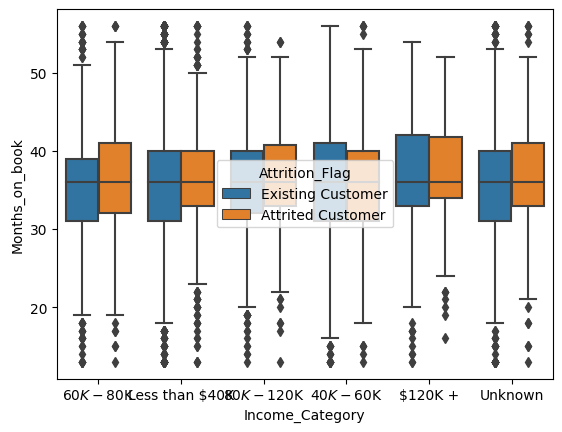

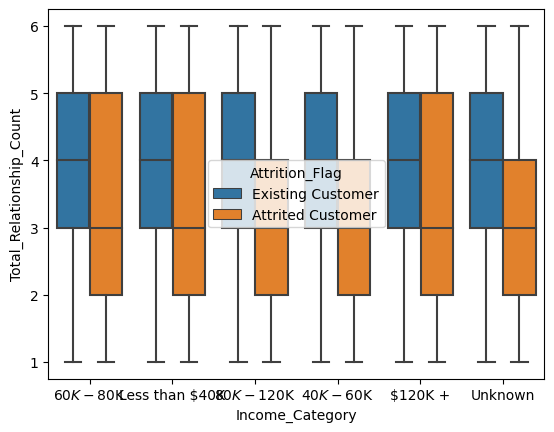

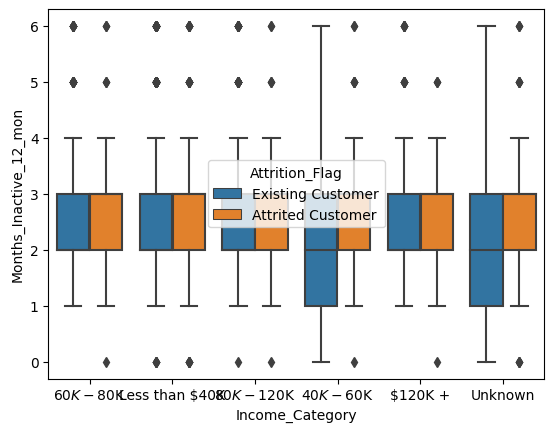

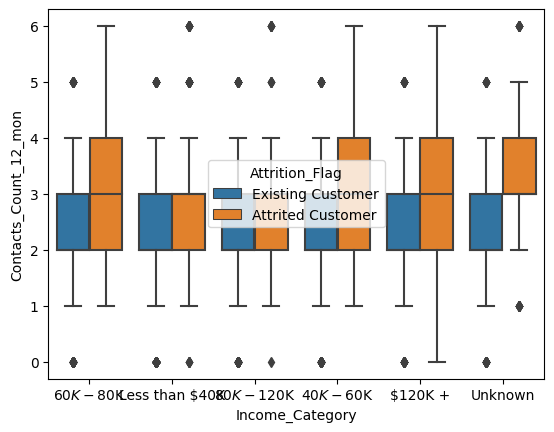

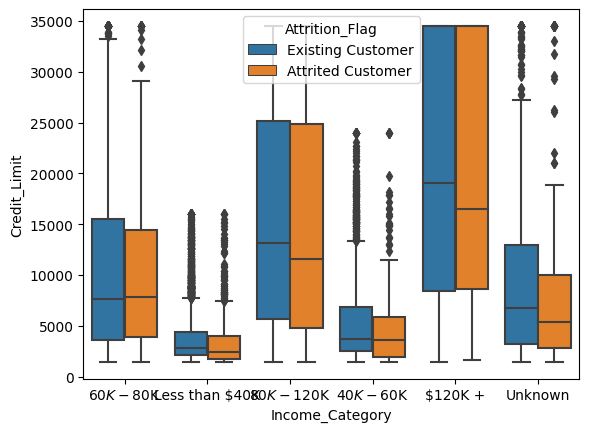

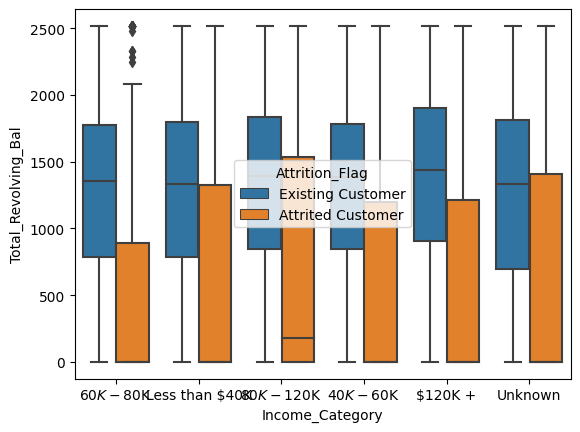

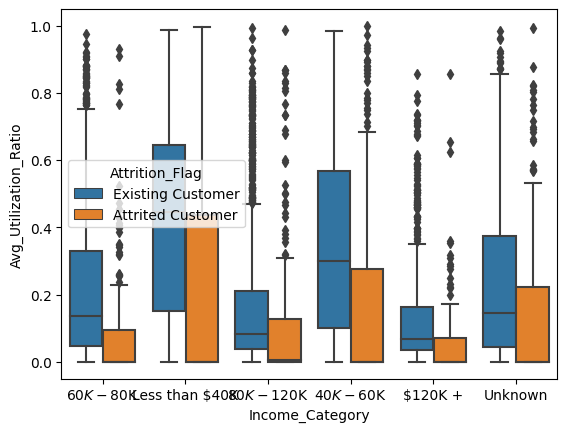

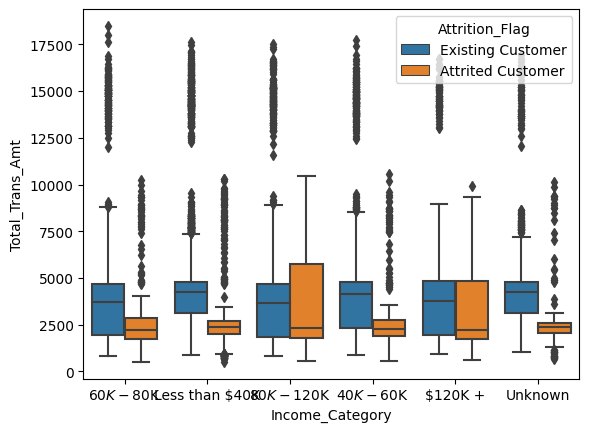

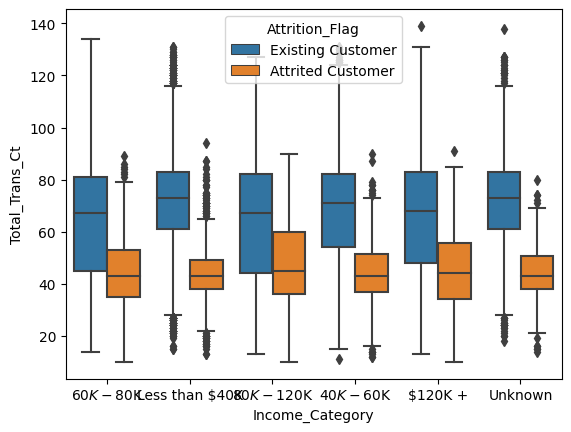

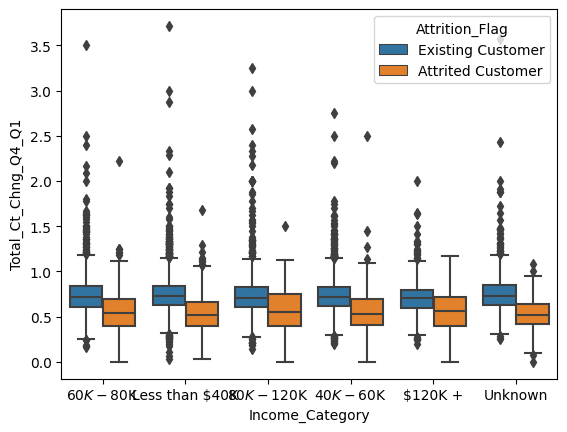

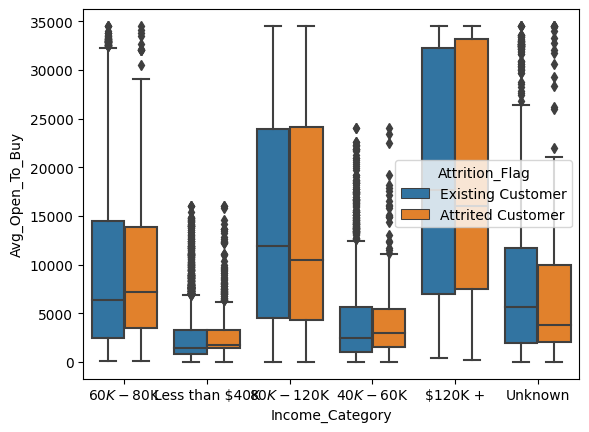

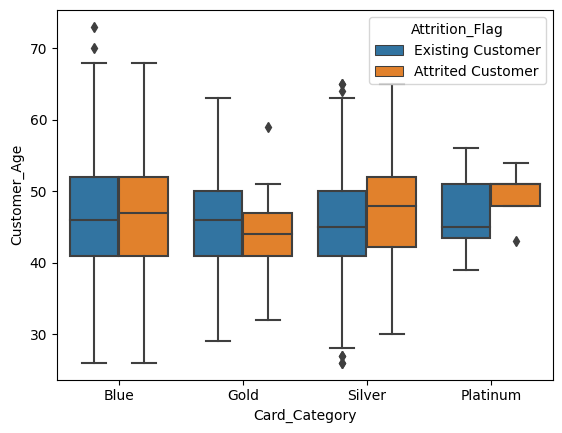

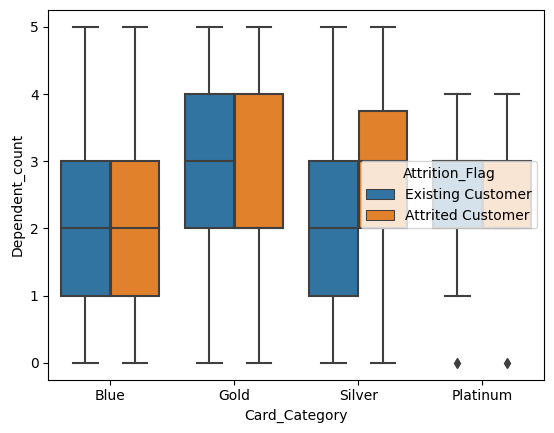

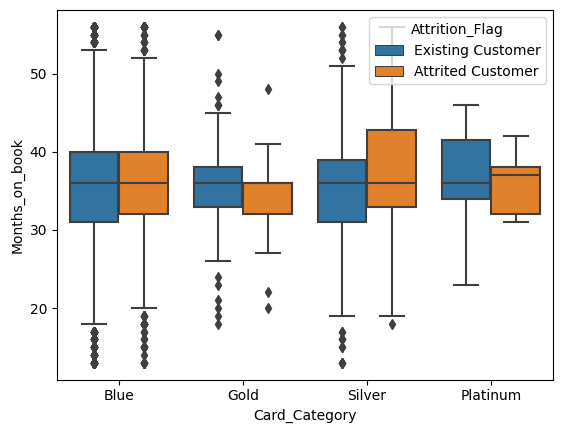

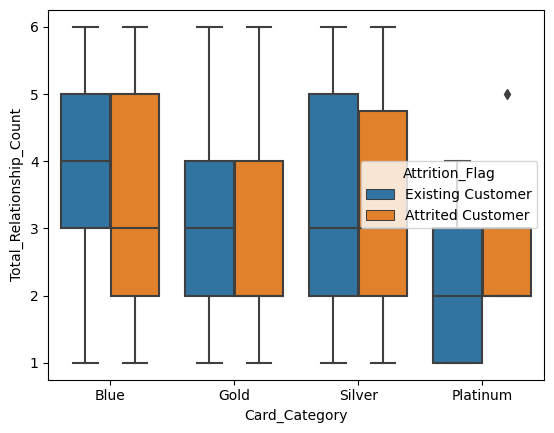

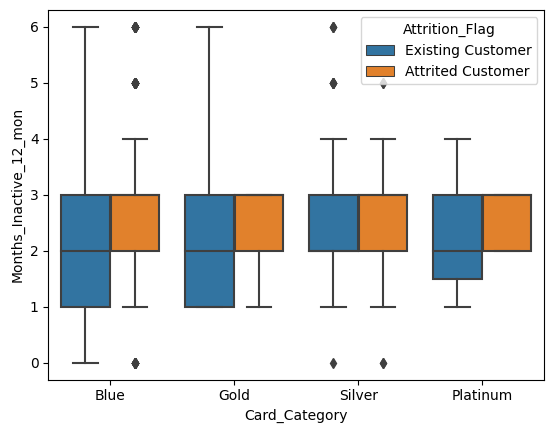

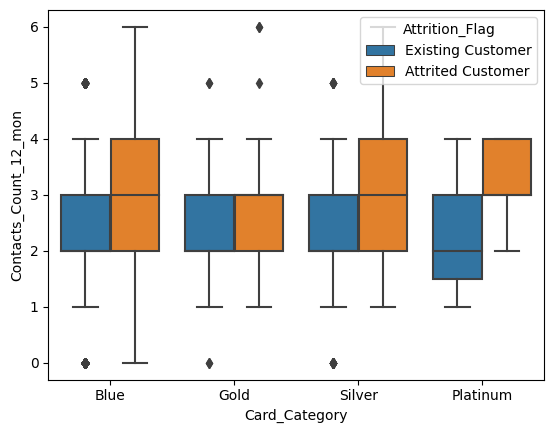

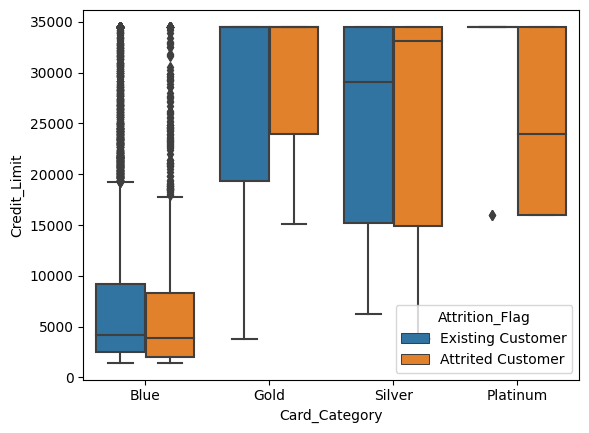

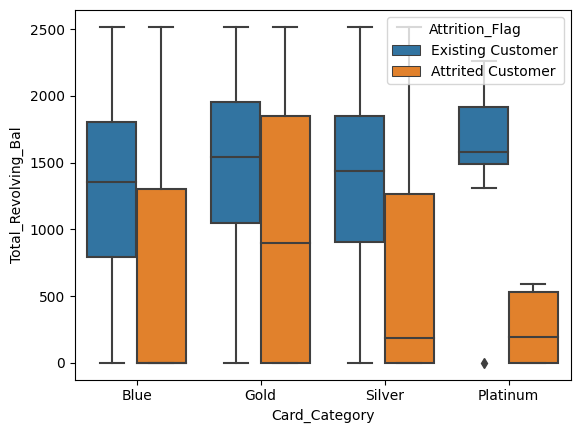

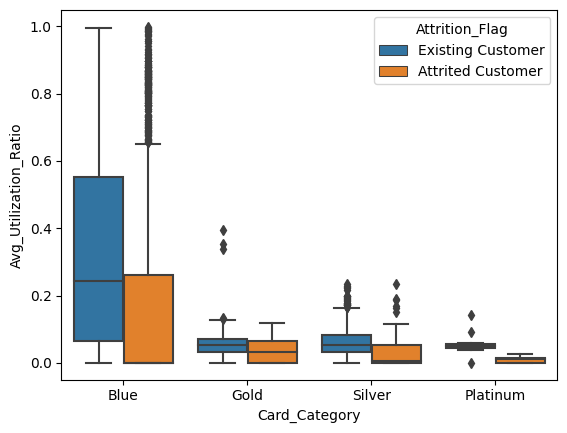

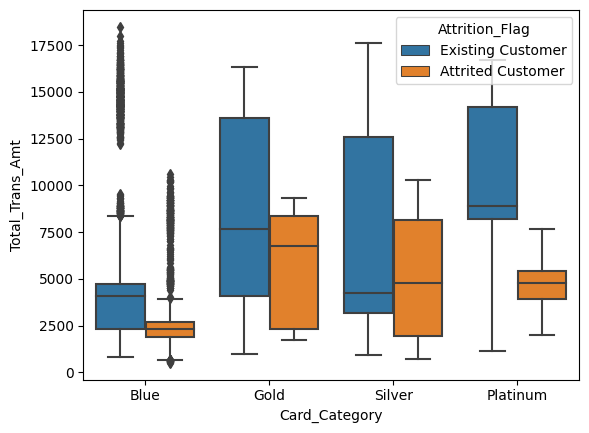

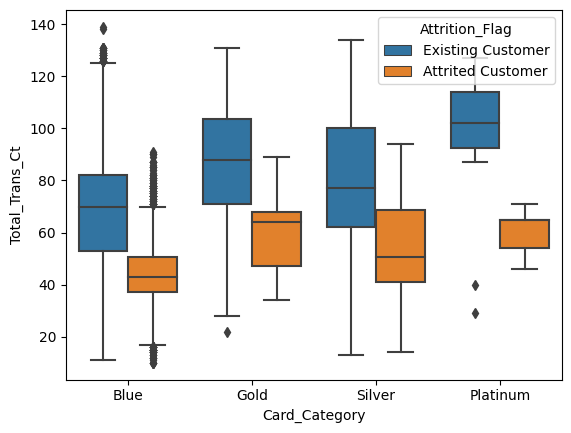

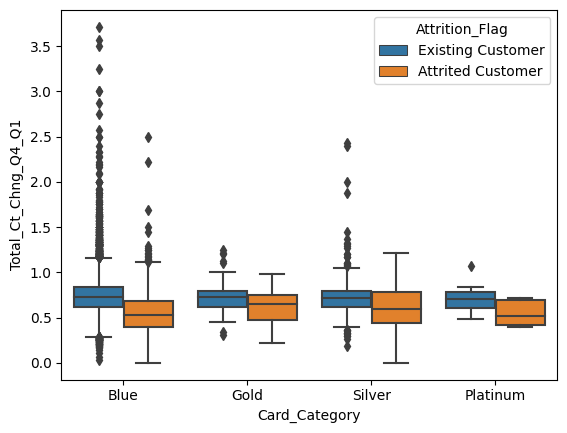

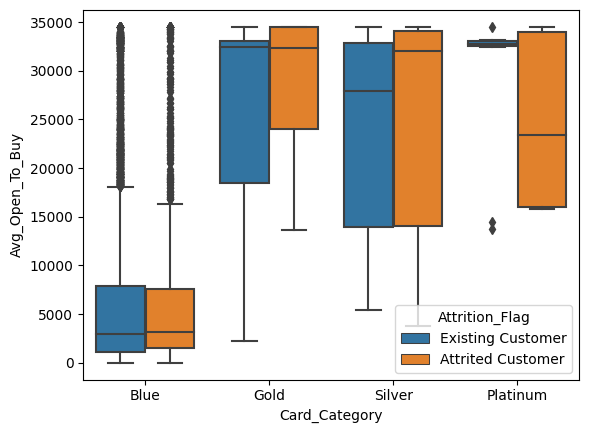

In [35]:
# Verificar a relação das variáveis categóricas com as numéricas
for cat_col in cat_cols:
    for num_col in num_cols:
        sns.boxplot(data=df[cols_to_keep], x=cat_col, y=num_col, hue='Attrition_Flag')
        plt.show()

In [36]:
df.isnull().sum()

Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Utilization_Ratio       0
Attrition_Flag              0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Open_To_Buy             0
dtype: int64